### Functions and libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GroupShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint
import xgboost as xgb
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, GroupShuffleSplit
import os
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import joblib 
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
def custom_split(data, prop):
    Id_ever_d = data[['IDENTIFIER', 'ever_default']].drop_duplicates()
    train_ids, test_ids = train_test_split(Id_ever_d, test_size=prop, stratify=Id_ever_d['ever_default'], random_state=2023)
    train = data[data['IDENTIFIER'].isin(train_ids['IDENTIFIER'])]
    test = data[data['IDENTIFIER'].isin(test_ids['IDENTIFIER'])]
    return train, test

def plot_loss_curves(history, x_val, y_val):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    # Add ROC-related metrics
    train_predictions = network.predict(X_train_resampled)
    val_predictions = network.predict(x_val)
    train_fpr, train_tpr, _ = roc_curve(Y_train_resampled, train_predictions)
    val_fpr, val_tpr, _ = roc_curve(y_val, val_predictions)
    train_auc = auc(train_fpr, train_tpr)
    val_auc = auc(val_fpr, val_tpr)
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(20, 7))
    # plot loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_loss, label="training_loss")
    plt.plot(epochs, val_loss, label="validation_loss")
    plt.title("Loss curves")
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    # plot accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracy, label="training_acc")
    plt.plot(epochs, val_accuracy, label="validation_acc")
    plt.title("Accuracy curves")
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    # plot ROC curve
    plt.subplot(1, 3, 3)
    plt.plot(train_fpr, train_tpr, label=f'Training ROC curve (AUC = {train_auc:.2f})')
    plt.plot(val_fpr, val_tpr, label=f'Validation ROC curve (AUC = {val_auc:.2f})')
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
def defaults_info(data):
    filtered_data = data[data['TARGET'] == 1]
    distinct_identifiers = filtered_data['IDENTIFIER'].unique()
    num_companies_in_default = len(distinct_identifiers)
    print(f"Months in 'default': {len(filtered_data)} rows")
    print(f"Distinct companies in default: {num_companies_in_default} companies")
    percentage_in_default = (len(distinct_identifiers) / data['IDENTIFIER'].nunique()) * 100
    print(f"Percentage of companies in default: {percentage_in_default:.2f}%")

def evaluate_model(model, data):
    """
    Evaluate a trained model on the test set and print metrics.
    Parameters:
    - model: Trained machine learning model (e.g., scikit-learn pipeline)
    - Test data
    """
    train_exclude_cols = ['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default','TARGET']
    X_test = data.drop(train_exclude_cols, axis=1)
    y_test = data['TARGET']
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("ROC AUC: {:.4f}".format(roc_auc))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
def evaluate_model_2(model, data):
    """
    Evaluate a trained model on the test set and print metrics.
    Parameters:
    - model: Trained machine learning model (e.g., scikit-learn pipeline)
    - Test data
    """
    train_exclude_cols = ['IDENTIFIER','ever_default','TARGET']
    X_test = data.drop(train_exclude_cols, axis=1)
    y_test = data['TARGET']
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("ROC AUC: {:.4f}".format(roc_auc))
    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 Score: {:.4f}".format(f1))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.4f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Import and format

In [3]:
data_model = pd.read_csv('data_model.csv')
len(data_model)

931109

In [4]:
numeric_columns = ['ASSET_AMT', 'TURNOVER_AMT',
                   'AUTONOMIA_FINAN_CORRIGIDA_PCT', 'RESULTADO_OPER_VS_JUROS_SUPOR',
                   'MEIOS_FINAN_PASSIVO_CORRENTE', 'PRAZO_MEDIO_RECEBIMENTO',
                   'NET_DEBT_EBITDA', 'MARGEM_EXPLO_JUROS_SUPORT', 'VOLUME_NEG_VS_ACT_CORR']
# Convert selected columns to numeric after removing commas
data_model[numeric_columns] = data_model[numeric_columns].astype('float64')
    
factor_columns = ['FLAG_STARTUP', 'FLAG_ESFL', 'FLAG_SGPS',
                  'INDICADOR_CRED_VENC_BANCA_12M', 'INDICADOR_CRED_VENC_GCA_12M',
                  'FLAG_DESCOBERTOS_N_AUT_12M', 'X_UTR_CD_12M', 'DEFAULT_FLG',
                  'SECTION_ECONOMIC_ACTIVITY_CD', 'IDENTIFIER', 'TARGET', 'ever_default']
# Convert selected columns to factors
data_model[factor_columns] = data_model[factor_columns].astype('category')

### Analysing the data

In [5]:
defaults_info(data_model)

Months in 'default': 14559 rows
Distinct companies in default: 827 companies
Percentage of companies in default: 2.37%


In [6]:
missing_proportion_by_column = data_model.isnull().mean(axis=0)
# Display the proportion of missing values for each column
print("Proportion of missing values by column:\n", missing_proportion_by_column)

Proportion of missing values by column:
 LOAD_DTTM                           0.000000
SECTION_ECONOMIC_ACTIVITY_CD        0.000000
FLAG_STARTUP                        0.000000
FLAG_ESFL                           0.000000
FLAG_SGPS                           0.000000
ASSET_AMT                           0.000000
TURNOVER_AMT                        0.000000
AUTONOMIA_FINAN_CORRIGIDA_PCT       0.000000
RESULTADO_OPER_VS_JUROS_SUPOR       0.000000
AVG_CRED_VENC_VS_RESP_CGA_12M       0.000000
AVG_CRED_VENC_VS_RESP_BANCA_12M     0.000000
INDICADOR_CRED_VENC_BANCA_12M       0.000000
INDICADOR_CRED_VENC_GCA_12M         0.000000
FLAG_DESCOBERTOS_N_AUT_12M          0.000000
TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO    0.000000
RESPONS_BANCA_VS_RENDIMENTO         0.000000
X_UTR_CD_12M                        0.000000
JUROS_GASTOS_SUPORTADOS_VS_ATIVO    0.000000
MEIOS_FINAN_PASSIVO_CORRENTE        0.000000
RESUL_ANTES_IMP_VS_RESP_BANCA       0.000000
PRAZO_MEDIO_RECEBIMENTO             0.000000
RESPONS_GCA_VS

### Splitting
Structure: 
1 - create a new column, month observed, month_obs, which will store the number of the month that we are observing for each firm.
2 - than, in order to avoid interpolation, instead of sampling rows, we sample firms, so we sample 70-30 of the firms that have defaulted at least once and the same goes for the firms that never have defaulted.
We will have: 0.7D + 0.7ND -> Training | 0.3D + 0.3ND -> Testing, where D - firms that defaulted at least once, ND - ... never def
So the same goes for the k-fold process


NOTE: What if we train the model on the default_flg and test the data on target. Because in my opinion training the model with a target that does not have any difference between a firm that is in default and one that will be in default in 12 months. 

In [7]:
len(data_model)

931109

In [8]:
data_p, test_f = custom_split(data_model, 0.3)

In [9]:
# TIME SAVER
#data_p, not_used = custom_split(data_p, 0.9)

In [10]:
defaults_info(data_p)

Months in 'default': 10152 rows
Distinct companies in default: 583 companies
Percentage of companies in default: 2.39%


In [11]:
defaults_info(test_f)

Months in 'default': 4407 rows
Distinct companies in default: 244 companies
Percentage of companies in default: 2.33%


In [12]:
data_p = data_p.drop(columns=['EXPOSURE'])

### Folds

In [13]:
# Folds
Id_ever_d = data_p[['IDENTIFIER', 'ever_default']].drop_duplicates()
exclude = ['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default']

folds = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
for train_index, test_index in cv.split(Id_ever_d['IDENTIFIER'], Id_ever_d['ever_default']):
    # Extracting training and testing identifiers
    train_ids = Id_ever_d['IDENTIFIER'].iloc[train_index]
    test_ids = Id_ever_d['IDENTIFIER'].iloc[test_index]

    # Creating training and testing datasets by filtering the original data
    train_data = data_p[data_p['IDENTIFIER'].isin(train_ids)]
    train_data =train_data.drop(exclude, axis=1)
    test_data = data_p[data_p['IDENTIFIER'].isin(test_ids)]

    # Appending the datasets to the folds list
    folds.append((train_data, test_data))

In [14]:
# Check if the test data in each fold is the same
for i, (_, test_fold) in enumerate(folds):
    if i > 0:
        # Compare the test identifiers of the current fold with the previous fold
        current_test_identifiers = set(test_fold['IDENTIFIER'])
        previous_test_identifiers = set(folds[i - 1][1]['IDENTIFIER'])
        
        if current_test_identifiers != previous_test_identifiers:
            print(f"Test data in Fold {i + 1} is different from Fold {i}.")

Test data in Fold 2 is different from Fold 1.
Test data in Fold 3 is different from Fold 2.
Test data in Fold 4 is different from Fold 3.
Test data in Fold 5 is different from Fold 4.


## ML Model

In [15]:
class CorrelationThreshold(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.8):
        self.threshold = threshold

    def fit(self, X, y=None):
        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
        to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        self.to_drop_ = to_drop
        return self

    def transform(self, X):
        return X.drop(self.to_drop_, axis=1)

In [16]:
numeric_features= folds[1][0].select_dtypes(include=[np.number]).columns.tolist() 
categorical_features = folds[1][0].select_dtypes(include=['category']).columns.tolist()
categorical_features.remove('TARGET')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('correlation_threshold', CorrelationThreshold(0.8)),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)])

#train_exclude_cols =['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default','TARGET']

def pipeline_custom(preprocessor,classifier):
    pipeline = ImbPipeline([('preprocessor', preprocessor),
                            ('undersampler', RandomUnderSampler(random_state=42)),
                            ('model', classifier)])
    return pipeline

In [17]:
for fold, (train_fold, val_fold) in enumerate(folds, start=1):
    num_positive_samples_train = (train_fold['TARGET'] == 1).sum()
    num_positive_samples_val = (val_fold['TARGET'] == 1).sum()
    print(f"Fold {fold}: Number of positive samples in training set: {num_positive_samples_train}")
    print(f"Fold {fold}: Number of positive samples in validation set: {num_positive_samples_val}")

Fold 1: Number of positive samples in training set: 8126
Fold 1: Number of positive samples in validation set: 2026
Fold 2: Number of positive samples in training set: 8148
Fold 2: Number of positive samples in validation set: 2004
Fold 3: Number of positive samples in training set: 8143
Fold 3: Number of positive samples in validation set: 2009
Fold 4: Number of positive samples in training set: 7946
Fold 4: Number of positive samples in validation set: 2206
Fold 5: Number of positive samples in training set: 8245
Fold 5: Number of positive samples in validation set: 1907


### Only LR

In [18]:
np.random.seed(2023)
param_distributions = {
    'Logistic Regression': {
        'model__C': uniform(0.00001, 0.5)}}


classifiers = [('Logistic Regression', LogisticRegression())]

# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Classifier', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Iterate over classifiers
for clf_name, clf in classifiers:
    # Iterate over random hyperparameter samples
    for i in range(100): 
        params = {
            'model__C': param_distributions[clf_name]['model__C'].rvs()}

        # Iterate over folds
        for j, (train_data, test_data) in enumerate(folds):
            # Define your regression target
            target = 'TARGET'
            # Separate features and target variable for the fold
            X_train = train_data.drop(target, axis=1)
            y_train = train_data[target]
            X_test = test_data.drop(target, axis=1)
            y_test = test_data[target]
            
            # Update pipeline_custom to set the hyperparameters correctly
            clf_instance = LogisticRegression(C=params['model__C'], max_iter=1000, solver = 'newton-cholesky')
            pipeline = pipeline_custom(preprocessor, clf_instance)

            # Fit the model
            pipeline.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = pipeline.predict(X_test)

            # Calculate metrics
            roc_auc = roc_auc_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append results to the DataFrame
            results = pd.concat([results, pd.DataFrame({
                'Classifier': clf_name,
                'Params': str(params),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1': f1}, index=[0])], ignore_index=True)

In [19]:
results_sorted = results.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
best_result['Params']

"{'model__C': 0.009180495444901227}"

In [20]:
from sklearn.metrics import roc_auc_score
import joblib 
# Sort the results DataFrame based on the desired metric (e.g., ROC_AUC)
results_sorted = results.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
# Extract information about the best model
best_clf_name = best_result['Classifier']
best_params = eval(best_result['Params'])  # Convert string to dictionary
# Create the best model using the best parameters
best_clf_instance = LogisticRegression(C=best_params['model__C'], max_iter=1000,solver = 'newton-cholesky')
best_pipeline = pipeline_custom(preprocessor, best_clf_instance)
# Fit the best model on the entire dataset
X_full = data_p.drop(target, axis=1)
y_full = data_p['TARGET']
best_pipeline.fit(X_full, y_full)
# Save the best model using joblib (or other appropriate method)
joblib.dump(best_pipeline, 'best_regression.pkl')

['best_regression.pkl']

ROC AUC: 0.9004
Accuracy: 0.9264
Precision: 0.1610
Recall: 0.8736
F1 Score: 0.2720
Confusion Matrix:
[[255442  20056]
 [   557   3850]]


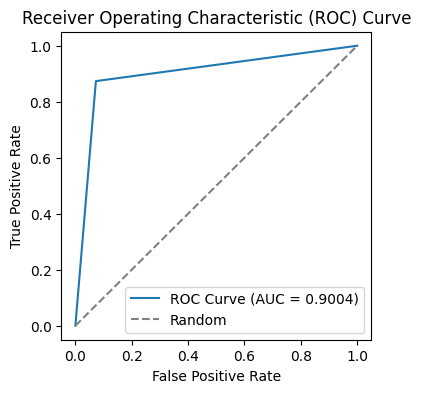

In [21]:
# Example usage:
evaluate_model(best_pipeline, test_f)

In [22]:
from sklearn.calibration import CalibratedClassifierCV
import joblib
# Load the best logistic regression model
best_pipeline = joblib.load('best_regression.pkl')
# Prepare the test set for logistic regression
X_test_logreg = test_f.drop(target, axis=1)
# Make predictions on the test set
y_pred_logreg = best_pipeline.predict(X_test_logreg)
# Now, you can calibrate the predictions using CalibratedClassifierCV
calibrated_clf = CalibratedClassifierCV(best_pipeline, method='sigmoid', cv='prefit')
# Assuming you have training data (data_p) to calibrate the model
X_train_calibrate = data_p.drop(target, axis=1)
y_train_calibrate = data_p['TARGET']
# Fit the calibrated model
calibrated_clf.fit(X_train_calibrate, y_train_calibrate)
# Calibrate the predictions
y_pred_calibrated_lr = calibrated_clf.predict_proba(X_test_logreg)[:, 1]
# Now y_pred_calibrated contains the calibrated probabilities
# Convert probabilities to percentages
test_f['LinReg_Prob'] = y_pred_calibrated_lr * 100
# Display the updated DataFrame
print(test_f.head())

     LOAD_DTTM SECTION_ECONOMIC_ACTIVITY_CD FLAG_STARTUP FLAG_ESFL FLAG_SGPS   
27  2021-05-31                            A          0.0       0.0       0.0  \
28  2021-06-30                            A          0.0       0.0       0.0   
29  2021-07-31                            A          0.0       0.0       0.0   
30  2021-08-31                            A          0.0       0.0       0.0   
31  2021-09-30                            A          0.0       0.0       0.0   

     ASSET_AMT  TURNOVER_AMT  AUTONOMIA_FINAN_CORRIGIDA_PCT   
27  2915875.69      86811.87                           0.29  \
28  2915875.69      86811.87                           0.29   
29  2915875.69      86811.87                           0.29   
30  2915875.69      86811.87                           0.29   
31  2915875.69      86811.87                           0.29   

    RESULTADO_OPER_VS_JUROS_SUPOR  AVG_CRED_VENC_VS_RESP_CGA_12M  ...   
27                           1.66                            0.0  .

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_13615/2171161286.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['LinReg_Prob'] = y_pred_calibrated_lr * 100


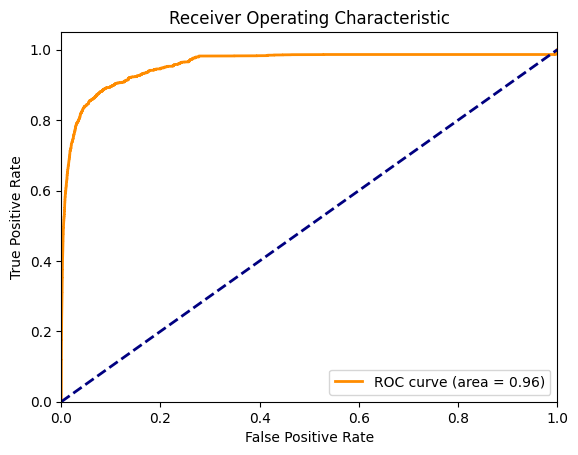

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_lr)
roc_auc = auc(fpr, tpr)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Only RF

In [24]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2023)
# Update the classifiers and parameter distributions
param_dist = {
    'Random Forest': {
        'model__n_estimators': randint(100, 200),
        'model__max_depth': randint(3, 5)}}

classifiers = [('Random Forest', RandomForestClassifier())]
# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Classifier', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])
# Iterate over classifiers
for clf_name, clf in classifiers:
    # Iterate over random hyperparameter samples
    for i in range(100):
        params = {
            'model__n_estimators': param_dist[clf_name]['model__n_estimators'].rvs(),
            'model__max_depth': param_dist[clf_name]['model__max_depth'].rvs()}
        # Iterate over folds
        for j, (train_data, test_data) in enumerate(folds):
            # Define your regression target
            target = 'TARGET'
            # Separate features and target variable for the fold
            X_train = train_data.drop(target, axis=1)
            y_train = train_data[target]
            X_test = test_data.drop(target, axis=1)
            y_test = test_data[target]
            # Update pipeline_custom to set the hyperparameters correctly
            clf_instance = RandomForestClassifier(
                n_estimators=params['model__n_estimators'],
                max_depth=params['model__max_depth'])
            pipeline = pipeline_custom(preprocessor, clf_instance)
            # Fit the model
            pipeline.fit(X_train, y_train)
            # Make predictions on the test set
            y_pred = pipeline.predict(X_test)
            # Calculate metrics
            roc_auc = roc_auc_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            # Append results to the DataFrame
            results = pd.concat([results, pd.DataFrame({
                'Classifier': clf_name,
                'Params': str(params),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1': f1}, index=[0])], ignore_index=True)

In [25]:
results_sorted = results.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
best_result['Params']

"{'model__n_estimators': 181, 'model__max_depth': 4}"

In [26]:
# Sort the results DataFrame based on the desired metric (e.g., ROC_AUC)
results_sorted = results.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
# Extract information about the best model
best_clf_name = best_result['Classifier']
best_params = eval(best_result['Params'])  # Convert string to dictionary
# Create the best model using the best parameters
best_clf_instance = RandomForestClassifier(
    n_estimators=best_params['model__n_estimators'],
    max_depth=best_params['model__max_depth'])
best_pipeline = pipeline_custom(preprocessor, best_clf_instance)
# Fit the best model on the entire dataset
X_full = data_p.drop(target, axis=1)
y_full = data_p['TARGET']
best_pipeline.fit(X_full, y_full)
# Save the best model using joblib (or other appropriate method)
joblib.dump(best_pipeline, 'best_RF.pkl')

['best_RF.pkl']

ROC AUC: 0.9219
Accuracy: 0.9272
Precision: 0.1679
Recall: 0.9165
F1 Score: 0.2839
Confusion Matrix:
[[255486  20012]
 [   368   4039]]


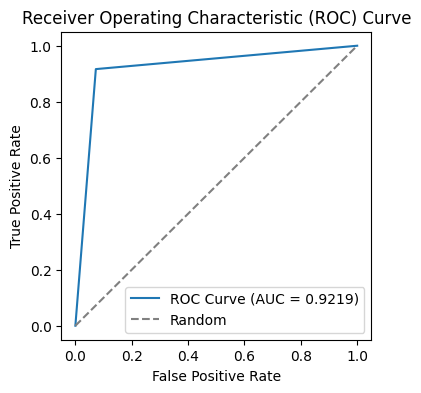

In [27]:
evaluate_model(best_pipeline, test_f)

In [28]:
from sklearn.calibration import CalibratedClassifierCV
import joblib
# Load the best RF model
best_RF = joblib.load('best_RF.pkl')
# Prepare the test set for RF
X_test_rf = test_f.drop(target, axis=1)
# Make predictions on the test set
y_pred_rf = best_RF.predict(X_test_rf)
# Now, you can calibrate the predictions using CalibratedClassifierCV
calibrated_clf_rf = CalibratedClassifierCV(best_RF, method='sigmoid', cv='prefit')
# Assuming you have training data (data_p) to calibrate the model
X_train_calibrate_rf = data_p.drop(target, axis=1)
y_train_calibrate_rf = data_p['TARGET']
# Fit the calibrated RF model
calibrated_clf_rf.fit(X_train_calibrate_rf, y_train_calibrate_rf)
# Calibrate the predictions
y_pred_calibrated_rf = calibrated_clf_rf.predict_proba(X_test_rf)[:, 1]
# Now y_pred_calibrated_rf contains the calibrated probabilities
# Convert probabilities to percentages
test_f['RF_Prob'] = y_pred_calibrated_rf * 100
# Display the updated DataFrame
print(test_f.head())

     LOAD_DTTM SECTION_ECONOMIC_ACTIVITY_CD FLAG_STARTUP FLAG_ESFL FLAG_SGPS   
27  2021-05-31                            A          0.0       0.0       0.0  \
28  2021-06-30                            A          0.0       0.0       0.0   
29  2021-07-31                            A          0.0       0.0       0.0   
30  2021-08-31                            A          0.0       0.0       0.0   
31  2021-09-30                            A          0.0       0.0       0.0   

     ASSET_AMT  TURNOVER_AMT  AUTONOMIA_FINAN_CORRIGIDA_PCT   
27  2915875.69      86811.87                           0.29  \
28  2915875.69      86811.87                           0.29   
29  2915875.69      86811.87                           0.29   
30  2915875.69      86811.87                           0.29   
31  2915875.69      86811.87                           0.29   

    RESULTADO_OPER_VS_JUROS_SUPOR  AVG_CRED_VENC_VS_RESP_CGA_12M  ...   
27                           1.66                            0.0  .

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_13615/1766309112.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['RF_Prob'] = y_pred_calibrated_rf * 100


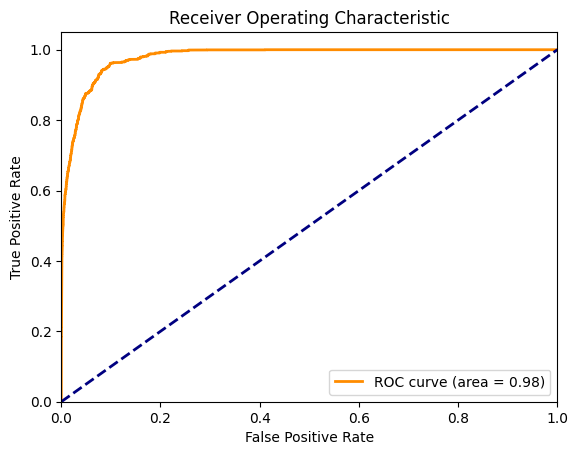

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_rf)
roc_auc = auc(fpr, tpr)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Only XGB

In [30]:
from xgboost import XGBClassifier
np.random.seed(2023)
# Update the classifiers and parameter distributions for XGBoost
param_dist_xgb = {
    'XGBoost': {
        'model__learning_rate': uniform(0.00001, 0.0001),
        'model__n_estimators': randint(100, 200),
        'model__max_depth': randint(3, 5)}}

classifiers_xgb = [('XGBoost', XGBClassifier())]

# Initialize an empty DataFrame to store results for XGBoost
results_xgb = pd.DataFrame(columns=['Classifier', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Iterate over classifiers for XGBoost
for clf_name_xgb, clf_xgb in classifiers_xgb:
    # Iterate over random hyperparameter samples for XGBoost
    for i in range(100):
        params_xgb = {
            'model__learning_rate': param_dist_xgb[clf_name_xgb]['model__learning_rate'].rvs(),
            'model__n_estimators': param_dist_xgb[clf_name_xgb]['model__n_estimators'].rvs(),
            'model__max_depth': param_dist_xgb[clf_name_xgb]['model__max_depth'].rvs()}

        # Iterate over folds for XGBoost
        for j, (train_data_xgb, test_data_xgb) in enumerate(folds):
            # Define your regression target for XGBoost
            target_xgb = 'TARGET'
            # Separate features and target variable for the fold for XGBoost
            X_train_xgb = train_data_xgb.drop(target_xgb, axis=1)
            y_train_xgb = train_data_xgb[target_xgb]
            X_test_xgb = test_data_xgb.drop(target_xgb, axis=1)
            y_test_xgb = test_data_xgb[target_xgb]
            # Update pipeline_custom to set the hyperparameters correctly for XGBoost
            clf_instance_xgb = XGBClassifier(
                learning_rate=params_xgb['model__learning_rate'],
                n_estimators=params_xgb['model__n_estimators'],
                max_depth=params_xgb['model__max_depth'])
            pipeline_xgb = pipeline_custom(preprocessor, clf_instance_xgb)
            # Fit the model for XGBoost
            pipeline_xgb.fit(X_train_xgb, y_train_xgb)
            # Make predictions on the test set for XGBoost
            y_pred_xgb = pipeline_xgb.predict(X_test_xgb)
            # Calculate metrics for XGBoost
            roc_auc_xgb = roc_auc_score(y_test_xgb, y_pred_xgb)
            accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)
            precision_xgb = precision_score(y_test_xgb, y_pred_xgb)
            recall_xgb = recall_score(y_test_xgb, y_pred_xgb)
            f1_xgb = f1_score(y_test_xgb, y_pred_xgb)
            # Append results to the DataFrame for XGBoost
            results_xgb = pd.concat([results_xgb, pd.DataFrame({
                'Classifier': clf_name_xgb,
                'Params': str(params_xgb),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc_xgb,
                'Accuracy': accuracy_xgb,
                'Precision': precision_xgb,
                'Recall': recall_xgb,
                'F1': f1_xgb}, index=[0])], ignore_index=True)

In [31]:
results_sorted = results_xgb.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
best_result['Params']

"{'model__learning_rate': 5.034967047891276e-05, 'model__n_estimators': 143, 'model__max_depth': 4}"

In [32]:
# Sort the results DataFrame based on the desired metric (e.g., ROC_AUC)
results_sorted = results_xgb.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
# Extract information about the best model
best_clf_name = best_result['Classifier']
best_params = eval(best_result['Params'])  # Convert string to dictionary
# Create the best model using the best parameters
best_clf_instance = XGBClassifier(
    learning_rate=best_params['model__learning_rate'],
    n_estimators=best_params['model__n_estimators'],
    max_depth=best_params['model__max_depth'])
best_pipeline = pipeline_custom(preprocessor, best_clf_instance)
# Fit the best model on the entire dataset
X_full = data_p.drop(target, axis=1)
y_full = data_p['TARGET']
best_pipeline.fit(X_full, y_full)
# Save the best model using joblib (or other appropriate method)
joblib.dump(best_pipeline, 'best_XGB.pkl')

['best_XGB.pkl']

ROC AUC: 0.9207
Accuracy: 0.9155
Precision: 0.1489
Recall: 0.9260
F1 Score: 0.2566
Confusion Matrix:
[[252174  23324]
 [   326   4081]]


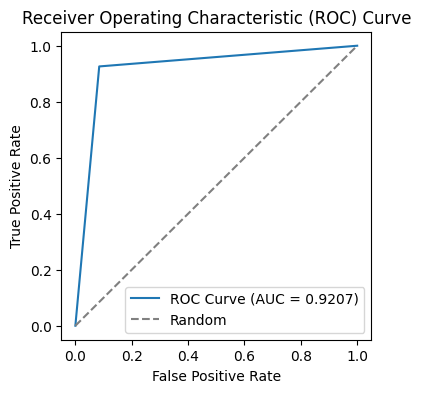

In [33]:
evaluate_model(best_pipeline, test_f)

In [34]:
# Load the best XGBoost model
best_XGB = joblib.load('best_XGB.pkl')
# Prepare the test set for XGBoost
X_test_XGB = test_f.drop(target, axis=1)
# Make predictions on the test set
y_pred_XGB = best_XGB.predict(X_test_XGB)
# Now, you can calibrate the predictions using CalibratedClassifierCV
calibrated_clf_XGB = CalibratedClassifierCV(best_XGB, method='sigmoid', cv='prefit')
# Assuming you have training data (data_p) to calibrate the model
X_train_calibrate_XGB = data_p.drop(target, axis=1)
y_train_calibrate_XGB = data_p['TARGET']
# Fit the calibrated XGBoost model
calibrated_clf_XGB.fit(X_train_calibrate_XGB, y_train_calibrate_XGB)
# Calibrate the predictions
y_pred_calibrated_XGB = calibrated_clf_XGB.predict_proba(X_test_XGB)[:, 1]
# Now y_pred_calibrated_XGB contains the calibrated probabilities
# Convert probabilities to percentages
test_f['XGB_prob'] = y_pred_calibrated_XGB * 100
# Display the updated DataFrame
print(test_f.head())

     LOAD_DTTM SECTION_ECONOMIC_ACTIVITY_CD FLAG_STARTUP FLAG_ESFL FLAG_SGPS   
27  2021-05-31                            A          0.0       0.0       0.0  \
28  2021-06-30                            A          0.0       0.0       0.0   
29  2021-07-31                            A          0.0       0.0       0.0   
30  2021-08-31                            A          0.0       0.0       0.0   
31  2021-09-30                            A          0.0       0.0       0.0   

     ASSET_AMT  TURNOVER_AMT  AUTONOMIA_FINAN_CORRIGIDA_PCT   
27  2915875.69      86811.87                           0.29  \
28  2915875.69      86811.87                           0.29   
29  2915875.69      86811.87                           0.29   
30  2915875.69      86811.87                           0.29   
31  2915875.69      86811.87                           0.29   

    RESULTADO_OPER_VS_JUROS_SUPOR  AVG_CRED_VENC_VS_RESP_CGA_12M  ...   
27                           1.66                            0.0  .

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_13615/3763370133.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['XGB_prob'] = y_pred_calibrated_XGB * 100


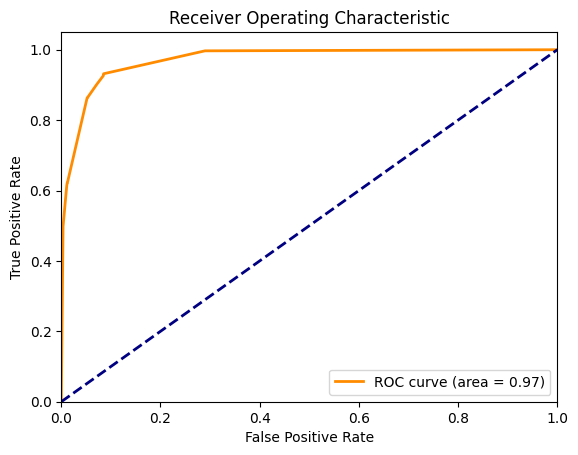

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_XGB)
roc_auc = auc(fpr, tpr)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Only SVM

In [36]:
np.random.seed(2023)
param_dist_svm = {
    'SVM': {
        'model__C': uniform(0.00001, 1.5),
        'model__kernel': ['linear']}}
classifiers_svm = [('SVM', SVC())] 
# Initialize an empty DataFrame to store results for SVM
results_svm = pd.DataFrame(columns=['Classifier', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])
# Iterate over classifiers for SVM
for clf_name_svm, clf_svm in classifiers_svm:
    # Iterate over random hyperparameter samples for SVM
    for i in range(100):
        params_svm = {
            'model__C': param_dist_svm[clf_name_svm]['model__C'].rvs(),
            'model__kernel': np.random.choice(param_dist_svm[clf_name_svm]['model__kernel'])}
        # Iterate over folds for SVM
        for j, (train_data_svm, test_data_svm) in enumerate(folds):
            # Define your regression target for SVM
            target_svm = 'TARGET'
            # Separate features and target variable for the fold for SVM
            X_train_svm = train_data_svm.drop(target_svm, axis=1)
            y_train_svm = train_data_svm[target_svm]
            X_test_svm = test_data_svm.drop(target_svm, axis=1)
            y_test_svm = test_data_svm[target_svm]
            # Update pipeline_custom to set the hyperparameters correctly for SVM
            clf_instance_svm = SVC(C=params_svm['model__C'], kernel=params_svm['model__kernel'],max_iter=1000)
            pipeline_svm = pipeline_custom(preprocessor, clf_instance_svm)
            # Fit the model for SVM
            pipeline_svm.fit(X_train_svm, y_train_svm)
            # Make predictions on the test set for SVM
            y_pred_svm = pipeline_svm.predict(X_test_svm)
            # Calculate metrics for SVM
            roc_auc_svm = roc_auc_score(y_test_svm, y_pred_svm)
            accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)
            precision_svm = precision_score(y_test_svm, y_pred_svm)
            recall_svm = recall_score(y_test_svm, y_pred_svm)
            f1_svm = f1_score(y_test_svm, y_pred_svm)
            # Append results to the DataFrame for SVM
            results_svm = pd.concat([results_svm, pd.DataFrame({
                'Classifier': clf_name_svm,
                'Params': str(params_svm),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc_svm,
                'Accuracy': accuracy_svm,
                'Precision': precision_svm,
                'Recall': recall_svm,
                'F1': f1_svm}, index=[0])], ignore_index=True)

/Users/eugeniulitvinenco/anaconda3/envs/tf-m1/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/eugeniulitvinenco/anaconda3/envs/tf-m1/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/eugeniulitvinenco/anaconda3/envs/tf-m1/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/eugeniulitvinenco/anaconda3/envs/tf-m1/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [37]:
results_sorted_svm = results_svm.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result_svm = results_sorted_svm.iloc[0]
print(best_result_svm['Params'])

{'model__C': 1.0633681808774214, 'model__kernel': 'linear'}


In [38]:
from sklearn.metrics import roc_auc_score
import joblib 
# Sort the results DataFrame based on the desired metric (e.g., ROC_AUC)
results_sorted_svm = results_svm.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result_svm = results_sorted_svm.iloc[0]
# Extract information about the best model for SVM
best_clf_name_svm = best_result_svm['Classifier']
best_params_svm = eval(best_result_svm['Params'])  # Convert string to dictionary
# Create the best model using the best parameters for SVM
best_clf_instance_svm = SVC(
    C=best_params_svm['model__C'],
    kernel=best_params_svm['model__kernel'],
    max_iter=1000) #class_weight='balanced'
best_pipeline_svm = pipeline_custom(preprocessor, best_clf_instance_svm)
# Fit the best model on the entire dataset for SVM
X_full_svm = data_p.drop(target, axis=1)
y_full_svm = data_p['TARGET']
best_pipeline_svm.fit(X_full_svm, y_full_svm)
# Save the best model using joblib (or other appropriate method) for SVM
joblib.dump(best_pipeline_svm, 'best_SVM.pkl')

/Users/eugeniulitvinenco/anaconda3/envs/tf-m1/lib/python3.8/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


['best_SVM.pkl']

ROC AUC: 0.7636
Accuracy: 0.5727
Precision: 0.0342
Recall: 0.9607
F1 Score: 0.0661
Confusion Matrix:
[[156070 119428]
 [   173   4234]]


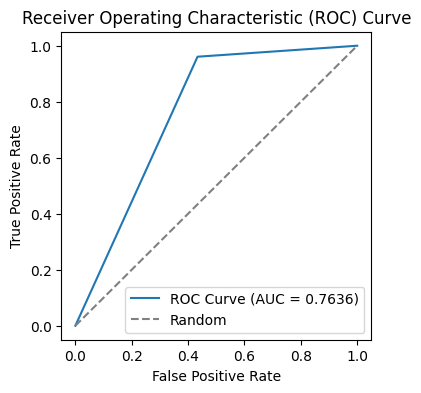

In [39]:
evaluate_model(best_pipeline_svm, test_f)

In [40]:
best_SVM = joblib.load('best_SVM.pkl')
# Prepare the test set for SVM
X_test_SVM = test_f.drop(target, axis=1)
# Make predictions on the test set
y_pred_SVM = best_SVM.predict(X_test_SVM)
# Now, you can calibrate the predictions using CalibratedClassifierCV
calibrated_clf_SVM = CalibratedClassifierCV(best_SVM, method='sigmoid', cv='prefit')
# Assuming you have training data (data_p) to calibrate the model
X_train_calibrate_SVM = data_p.drop(target, axis=1)
y_train_calibrate_SVM = data_p['TARGET']
# Fit the calibrated SVM model
calibrated_clf_SVM.fit(X_train_calibrate_SVM, y_train_calibrate_SVM)
# Calibrate the predictions
y_pred_calibrated_SVM = calibrated_clf_SVM.predict_proba(X_test_SVM)[:, 1]
# Now y_pred_calibrated_SVM contains the calibrated probabilities
# Convert probabilities to percentages
test_f['SVM_prob'] = y_pred_calibrated_SVM * 100
# Display the updated DataFrame
print(test_f.head())

     LOAD_DTTM SECTION_ECONOMIC_ACTIVITY_CD FLAG_STARTUP FLAG_ESFL FLAG_SGPS   
27  2021-05-31                            A          0.0       0.0       0.0  \
28  2021-06-30                            A          0.0       0.0       0.0   
29  2021-07-31                            A          0.0       0.0       0.0   
30  2021-08-31                            A          0.0       0.0       0.0   
31  2021-09-30                            A          0.0       0.0       0.0   

     ASSET_AMT  TURNOVER_AMT  AUTONOMIA_FINAN_CORRIGIDA_PCT   
27  2915875.69      86811.87                           0.29  \
28  2915875.69      86811.87                           0.29   
29  2915875.69      86811.87                           0.29   
30  2915875.69      86811.87                           0.29   
31  2915875.69      86811.87                           0.29   

    RESULTADO_OPER_VS_JUROS_SUPOR  AVG_CRED_VENC_VS_RESP_CGA_12M  ...   
27                           1.66                            0.0  .

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_13615/3772744451.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['SVM_prob'] = y_pred_calibrated_SVM * 100


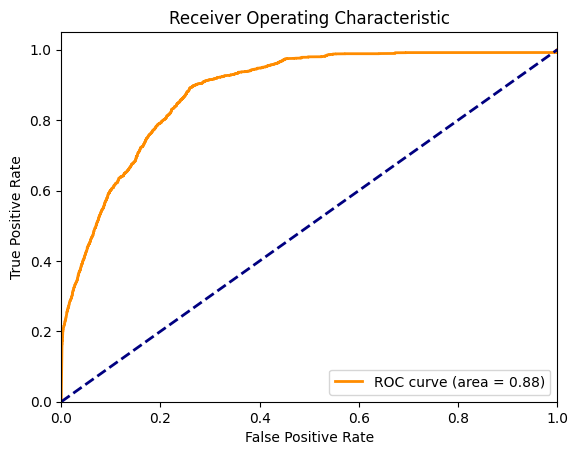

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_SVM)
roc_auc = auc(fpr, tpr)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Only KNN

In [42]:
np.random.seed(2023)
# Update the classifiers and parameter distributions for KNN
param_dist_knn = {
    'KNN': {
        'model__n_neighbors': randint(20, 30),  
        'model__weights': ['distance'],
        'model__metric': ['euclidean', 'manhattan']}}
classifiers_knn = [('KNN', KNeighborsClassifier())]

# Initialize an empty DataFrame to store results for KNN
results_knn = pd.DataFrame(columns=['Classifier', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Iterate over classifiers for KNN
for clf_name_knn, clf_knn in classifiers_knn:
    # Iterate over random hyperparameter samples for KNN
    for i in range(100):
        params_knn = {
            'model__weights': np.random.choice(param_dist_knn[clf_name_knn]['model__weights']),
            'model__metric': str(np.random.choice(param_dist_knn[clf_name_knn]['model__metric'])),
            'model__n_neighbors': param_dist_knn[clf_name_knn]['model__n_neighbors'].rvs()}
            
        # Iterate over folds for KNN
        for j, (train_data_knn, test_data_knn) in enumerate(folds):
            # Define your regression target for KNN
            target_knn = 'TARGET'
            # Separate features and target variable for the fold for KNN
            X_train_knn = train_data_knn.drop(target_xgb, axis=1)
            y_train_knn = train_data_knn[target_knn]
            X_test_knn = test_data_knn.drop(target_xgb, axis=1)
            y_test_knn = test_data_knn[target_knn]
            
            # Update pipeline_custom to set the hyperparameters correctly for KNN
            clf_instance_knn = KNeighborsClassifier(
                n_neighbors=params_knn['model__n_neighbors'],
                weights=params_knn['model__weights'],
                metric=params_knn['model__metric'])
            pipeline_knn = pipeline_custom(preprocessor, clf_instance_knn)
            
            # Fit the model for KNN
            pipeline_knn.fit(X_train_knn, y_train_knn)
            
            # Make predictions on the test set for KNN
            y_pred_knn = pipeline_knn.predict(X_test_knn)
            
            # Calculate metrics for KNN
            roc_auc_knn = roc_auc_score(y_test_knn, y_pred_knn)
            accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
            precision_knn = precision_score(y_test_knn, y_pred_knn)
            recall_knn = recall_score(y_test_knn, y_pred_knn)
            f1_knn = f1_score(y_test_knn, y_pred_knn)
            
            # Append results to the DataFrame for KNN
            results_knn = pd.concat([results_knn, pd.DataFrame({
                'Classifier': clf_name_knn,
                'Params': str(params_knn),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc_knn,
                'Accuracy': accuracy_knn,
                'Precision': precision_knn,
                'Recall': recall_knn,
                'F1': f1_knn}, index=[0])], ignore_index=True)

In [43]:
# Sort the results DataFrame based on the desired metric (e.g., ROC_AUC) for KNN
results_sorted_knn = results_knn.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model) for KNN
best_result_knn = results_sorted_knn.iloc[0]
# Extract information about the best model for KNN
best_clf_name_knn = best_result_knn['Classifier']
best_params_knn = eval(best_result_knn['Params'])  # Convert string to dictionary
# Create the best model using the best parameters for KNN
best_clf_instance_knn = KNeighborsClassifier(
    n_neighbors=30,
    weights=best_params_knn['model__weights'],
    metric=best_params_knn['model__metric'])
best_pipeline_knn = pipeline_custom(preprocessor, best_clf_instance_knn)
# Fit the best model on the entire dataset for KNN
X_full_knn = data_p.drop(target, axis=1)
y_full_knn = data_p['TARGET']
best_pipeline_knn.fit(X_full_knn, y_full_knn)
# Save the best model using joblib (or other appropriate method) for KNN
joblib.dump(best_pipeline_knn, 'best_KNN.pkl')

['best_KNN.pkl']

ROC AUC: 0.9036
Accuracy: 0.9276
Precision: 0.1640
Recall: 0.8788
F1 Score: 0.2765
Confusion Matrix:
[[255759  19739]
 [   534   3873]]


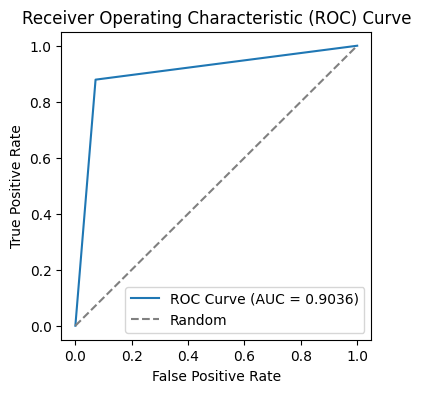

In [44]:
evaluate_model(best_pipeline_knn, test_f)

In [45]:
best_KNN = joblib.load('best_KNN.pkl')
# Prepare the test set for KNN
X_test_KNN = test_f.drop(target, axis=1)
# Make predictions on the test set
y_pred_KNN = best_KNN.predict(X_test_KNN)
# Now, you can calibrate the predictions using CalibratedClassifierCV
calibrated_clf_KNN = CalibratedClassifierCV(best_KNN, method='sigmoid', cv='prefit')
# Assuming you have training data (data_p) to calibrate the model
X_train_calibrate_KNN = data_p.drop(target, axis=1)
y_train_calibrate_KNN = data_p['TARGET']
# Fit the calibrated KNN model
calibrated_clf_KNN.fit(X_train_calibrate_KNN, y_train_calibrate_KNN)
# Calibrate the predictions
y_pred_calibrated_KNN = calibrated_clf_KNN.predict_proba(X_test_KNN)[:, 1]
# Now y_pred_calibrated_KNN contains the calibrated probabilities
# Convert probabilities to percentages
test_f['KNN_prob'] = y_pred_calibrated_KNN * 100
# Display the updated DataFrame
print(test_f.head())

     LOAD_DTTM SECTION_ECONOMIC_ACTIVITY_CD FLAG_STARTUP FLAG_ESFL FLAG_SGPS   
27  2021-05-31                            A          0.0       0.0       0.0  \
28  2021-06-30                            A          0.0       0.0       0.0   
29  2021-07-31                            A          0.0       0.0       0.0   
30  2021-08-31                            A          0.0       0.0       0.0   
31  2021-09-30                            A          0.0       0.0       0.0   

     ASSET_AMT  TURNOVER_AMT  AUTONOMIA_FINAN_CORRIGIDA_PCT   
27  2915875.69      86811.87                           0.29  \
28  2915875.69      86811.87                           0.29   
29  2915875.69      86811.87                           0.29   
30  2915875.69      86811.87                           0.29   
31  2915875.69      86811.87                           0.29   

    RESULTADO_OPER_VS_JUROS_SUPOR  AVG_CRED_VENC_VS_RESP_CGA_12M  ...   
27                           1.66                            0.0  .

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_13615/3880145605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['KNN_prob'] = y_pred_calibrated_KNN * 100


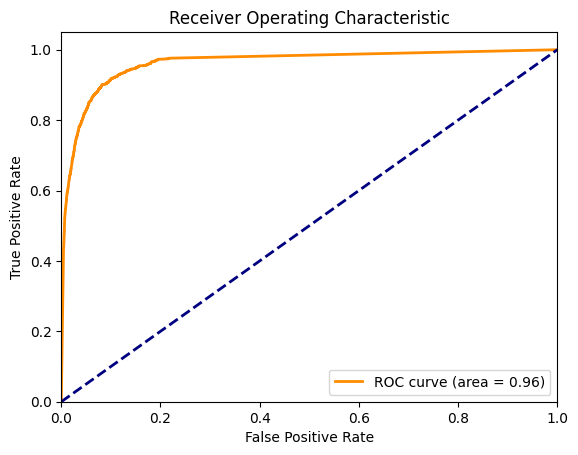

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_KNN)
roc_auc = auc(fpr, tpr)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## DT + LR

In [47]:
train_dt, train_lr_2 = custom_split(data_p, 0.5)

print('data_p:',len(data_p))
print('train_dt:',len(train_dt),' | train_lr_2:',len(train_lr_2))

data_p: 651204
train_dt: 325668  | train_lr_2: 325536


In [48]:
# Folds
Id_ever_d = train_dt[['IDENTIFIER', 'ever_default']].drop_duplicates()
exclude = ['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default']
folds = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
for train_index, test_index in cv.split(Id_ever_d['IDENTIFIER'], Id_ever_d['ever_default']):
    # Extracting training and testing identifiers
    train_ids = Id_ever_d['IDENTIFIER'].iloc[train_index]
    test_ids = Id_ever_d['IDENTIFIER'].iloc[test_index]
    # Creating training and testing datasets by filtering the original data
    train_data = train_dt[train_dt['IDENTIFIER'].isin(train_ids)]
    train_data =train_data.drop(exclude, axis=1)
    test_data = train_dt[train_dt['IDENTIFIER'].isin(test_ids)]
    # Appending the datasets to the folds list
    folds.append((train_data, test_data))

In [49]:
# Check if the test data in each fold is the same
for i, (_, test_fold) in enumerate(folds):
    if i > 0:
        # Compare the test identifiers of the current fold with the previous fold
        current_test_identifiers = set(test_fold['IDENTIFIER'])
        previous_test_identifiers = set(folds[i - 1][1]['IDENTIFIER'])
        
        if current_test_identifiers != previous_test_identifiers:
            print(f"Test data in Fold {i + 1} is different from Fold {i}.")

Test data in Fold 2 is different from Fold 1.
Test data in Fold 3 is different from Fold 2.
Test data in Fold 4 is different from Fold 3.
Test data in Fold 5 is different from Fold 4.


In [50]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(2023)
# Define your target variable and features
target = 'TARGET'

# Define the parameter distribution for the Decision Tree
param_distributions = {
    'Decision Tree': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth':  randint(4,5), # 3
        'model__min_samples_split': uniform(0.1, 0.9)}}

# Define a list of classifiers to try
classifiers = [('Decision Tree', DecisionTreeClassifier())]

# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['Classifier', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Iterate over classifiers
for clf_name, clf in classifiers:
    # Iterate over random hyperparameter samples
    for i in range(100): 
        params = {
            'model__criterion': np.random.choice(param_distributions[clf_name]['model__criterion']),
            'model__max_depth': param_distributions[clf_name]['model__max_depth'].rvs(),
            'model__min_samples_split': param_distributions[clf_name]['model__min_samples_split'].rvs()}

        # Iterate over folds
        for j, (train_data, test_data) in enumerate(folds):
            # Define your target variable
            target = 'TARGET'

            # Separate features and target variable for the fold
            X_train = train_data.drop(target_xgb, axis=1)
            y_train = train_data[target]

            X_test = test_data.drop(target_xgb, axis=1)
            y_test = test_data[target]
            
            # Update pipeline_custom to set the hyperparameters correctly
            clf_instance = DecisionTreeClassifier(
                criterion=params['model__criterion'],
                max_depth=params['model__max_depth'],
                min_samples_split=params['model__min_samples_split'],
                min_samples_leaf= 10
            )
            pipeline = pipeline_custom(preprocessor, clf_instance)

            # Fit the model
            pipeline.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = pipeline.predict(X_test)

            # Calculate metrics
            roc_auc = roc_auc_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append results to the DataFrame
            results = pd.concat([results, pd.DataFrame({
                'Classifier': clf_name,
                'Params': str(params),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1': f1}, index=[0])], ignore_index=True)

In [51]:
results_sorted = results.sort_values(by='ROC_AUC', ascending=False)

# Take the top row (best model)
best_result = results_sorted.iloc[0]

# Extract information about the best Decision Tree model
best_params = eval(best_result['Params'])  # Convert string to dictionary

# Create the best Decision Tree model using the best parameters
best_clf_instance = DecisionTreeClassifier(
    criterion=best_params['model__criterion'],
    max_depth=best_params['model__max_depth'],
    min_samples_split=best_params['model__min_samples_split'],
    min_samples_leaf= 10)

best_pipeline = pipeline_custom(preprocessor, best_clf_instance)

# Fit the best Decision Tree model on the entire dataset
X_full = data_p.drop(target, axis=1)
y_full = data_p['TARGET']
best_pipeline.fit(X_full, y_full)

# Save the best Decision Tree model using joblib (or other appropriate method)
joblib.dump(best_pipeline, 'best_decision_tree.pkl')

['best_decision_tree.pkl']

In [52]:
best_result['Params']

"{'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_split': 0.11777652808938217}"

ROC AUC: 0.9132
Accuracy: 0.9019
Precision: 0.1306
Recall: 0.9249
F1 Score: 0.2289
Confusion Matrix:
[[248374  27124]
 [   331   4076]]


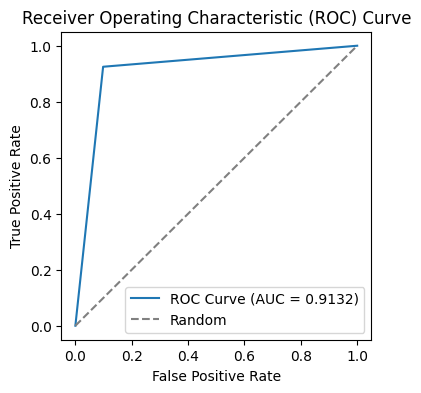

In [53]:
evaluate_model(best_pipeline, test_f)

In [54]:
# Function to apply rules and create binary variables
def apply_rules_and_create_binary(tree, data, feature_names, categorical_columns, preprocessor):
    # Make a copy of the data to avoid modifying the original
    data_copy = data.copy()

    # Apply the same preprocessing as in the pipeline
    data_copy = preprocessor.transform(data_copy)

    # Apply the Decision Tree rules
    leaf_ids = tree.apply(data_copy)

    # Create binary variables for each unique leaf in the Decision Tree
    rules_result = pd.DataFrame()

    for leaf_id in np.unique(leaf_ids):
        rule_name = f'tree_rule_{leaf_id}'
        rules_result[rule_name] = (leaf_ids == leaf_id).astype(int)

    return rules_result

# Apply the rules and create binary variables in train_lr
rules_result = apply_rules_and_create_binary(best_clf_instance, train_lr_2, train_lr_2.columns, categorical_features, preprocessor)
train_lr_2.reset_index(drop=True, inplace=True)
rules_result.reset_index(drop=True, inplace=True)
train_lr_2_full = pd.concat([train_lr_2, rules_result], axis=1)

In [55]:
# I will apply the rules to data_p and to test_f so then I can produce the final estimations
data_dt_lr = data_p
test_dt_lr = test_f
# Apply the rules and create binary variables in data_dt_lr
rules_result = apply_rules_and_create_binary(best_clf_instance, data_dt_lr, data_dt_lr.columns, categorical_features, preprocessor)
data_dt_lr.reset_index(drop=True, inplace=True)
rules_result.reset_index(drop=True, inplace=True)
data_dt_lr = pd.concat([data_dt_lr, rules_result], axis=1)

# Apply the rules and create binary variables in data_dt_lr
rules_result = apply_rules_and_create_binary(best_clf_instance, test_dt_lr, test_dt_lr.columns, categorical_features, preprocessor)
test_dt_lr.reset_index(drop=True, inplace=True)
rules_result.reset_index(drop=True, inplace=True)
test_dt_lr = pd.concat([test_dt_lr, rules_result], axis=1)

In [56]:
pd.set_option('display.max_columns', None)
train_lr_2_full.head()

,LOAD_DTTM,SECTION_ECONOMIC_ACTIVITY_CD,FLAG_STARTUP,FLAG_ESFL,FLAG_SGPS,ASSET_AMT,TURNOVER_AMT,AUTONOMIA_FINAN_CORRIGIDA_PCT,RESULTADO_OPER_VS_JUROS_SUPOR,AVG_CRED_VENC_VS_RESP_CGA_12M,AVG_CRED_VENC_VS_RESP_BANCA_12M,INDICADOR_CRED_VENC_BANCA_12M,INDICADOR_CRED_VENC_GCA_12M,FLAG_DESCOBERTOS_N_AUT_12M,TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO,RESPONS_BANCA_VS_RENDIMENTO,X_UTR_CD_12M,JUROS_GASTOS_SUPORTADOS_VS_ATIVO,MEIOS_FINAN_PASSIVO_CORRENTE,RESUL_ANTES_IMP_VS_RESP_BANCA,PRAZO_MEDIO_RECEBIMENTO,RESPONS_GCA_VS_RENDIMENTO,NET_DEBT_EBITDA,MARGEM_EXPLO_JUROS_SUPORT,VOLUME_NEG_VS_ACT_CORR,RESPONS_BANCA_VS_EBITDA,CLASSIFICATION_Q,FINAL_RATING_STANDARD,UNEMPLOYMENT_RT,DEFAULT_FLG,IDENTIFIER,ever_default,TARGET,tree_rule_3,tree_rule_5,tree_rule_6,tree_rule_9,tree_rule_10,tree_rule_12,tree_rule_13,tree_rule_16,tree_rule_18,tree_rule_19,tree_rule_20
0,2020-09-30,G,0.0,0.0,0.0,2585325.84,1277202.18,0.14,2.21,0.0,0.0,0.0,0.0,0,0.63,1.067430,0.0,0.03,0.13,0.061281,5.25,0.961234,7.36,6.65,6.39,7.475686,46.8,5.0,5.75,0.0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0
1,2020-10-31,G,0.0,0.0,0.0,2585325.84,1277202.18,0.14,2.21,0.0,0.0,0.0,0.0,0,0.63,1.066099,0.0,0.03,0.13,0.061358,5.25,0.961234,7.36,6.65,6.39,7.466365,46.8,5.0,5.75,0.0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0
2,2020-11-30,G,0.0,0.0,0.0,2585325.84,1277202.18,0.14,2.21,0.0,0.0,0.0,0.0,0,0.63,1.062237,0.0,0.03,0.13,0.061581,5.25,0.961234,7.36,6.65,6.39,7.439315,46.8,4.0,5.75,0.0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0
3,2020-12-31,G,0.0,0.0,0.0,2585325.84,1277202.18,0.14,2.21,0.0,0.0,0.0,0.0,0,0.63,1.059115,0.0,0.03,0.13,0.061762,5.25,0.961234,7.36,6.65,6.39,7.417450,46.8,4.0,5.70,0.0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0
4,2021-01-31,G,0.0,0.0,0.0,2585325.84,1277202.18,0.14,2.21,0.0,0.0,0.0,0.0,0,0.63,1.084160,0.0,0.03,0.13,0.060336,5.25,0.983658,7.36,6.65,6.39,7.592852,46.8,4.0,5.70,0.0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0


In [57]:
# Folds
Id_ever_d = train_lr_2_full[['IDENTIFIER', 'ever_default']].drop_duplicates()
exclude = ['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default']
folds = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
for train_index, test_index in cv.split(Id_ever_d['IDENTIFIER'], Id_ever_d['ever_default']):
    # Extracting training and testing identifiers
    train_ids = Id_ever_d['IDENTIFIER'].iloc[train_index]
    test_ids = Id_ever_d['IDENTIFIER'].iloc[test_index]
    # Creating training and testing datasets by filtering the original data
    train_data = train_lr_2_full[train_lr_2_full['IDENTIFIER'].isin(train_ids)]
    train_data =train_data.drop(exclude, axis=1)
    test_data = train_lr_2_full[train_lr_2_full['IDENTIFIER'].isin(test_ids)]
    # Appending the datasets to the folds list
    folds.append((train_data, test_data))

In [58]:
# Check if the test data in each fold is the same
for i, (_, test_fold) in enumerate(folds):
    if i > 0:
        # Compare the test identifiers of the current fold with the previous fold
        current_test_identifiers = set(test_fold['IDENTIFIER'])
        previous_test_identifiers = set(folds[i - 1][1]['IDENTIFIER'])
        
        if current_test_identifiers != previous_test_identifiers:
            print(f"Test data in Fold {i + 1} is different from Fold {i}.")

Test data in Fold 2 is different from Fold 1.
Test data in Fold 3 is different from Fold 2.
Test data in Fold 4 is different from Fold 3.
Test data in Fold 5 is different from Fold 4.


In [59]:
test_dt_lr.columns

Index(['LOAD_DTTM', 'SECTION_ECONOMIC_ACTIVITY_CD', 'FLAG_STARTUP',
       'FLAG_ESFL', 'FLAG_SGPS', 'ASSET_AMT', 'TURNOVER_AMT',
       'AUTONOMIA_FINAN_CORRIGIDA_PCT', 'RESULTADO_OPER_VS_JUROS_SUPOR',
       'AVG_CRED_VENC_VS_RESP_CGA_12M', 'AVG_CRED_VENC_VS_RESP_BANCA_12M',
       'INDICADOR_CRED_VENC_BANCA_12M', 'INDICADOR_CRED_VENC_GCA_12M',
       'FLAG_DESCOBERTOS_N_AUT_12M', 'TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO',
       'RESPONS_BANCA_VS_RENDIMENTO', 'X_UTR_CD_12M',
       'JUROS_GASTOS_SUPORTADOS_VS_ATIVO', 'MEIOS_FINAN_PASSIVO_CORRENTE',
       'RESUL_ANTES_IMP_VS_RESP_BANCA', 'PRAZO_MEDIO_RECEBIMENTO',
       'RESPONS_GCA_VS_RENDIMENTO', 'NET_DEBT_EBITDA',
       'MARGEM_EXPLO_JUROS_SUPORT', 'VOLUME_NEG_VS_ACT_CORR',
       'RESPONS_BANCA_VS_EBITDA', 'CLASSIFICATION_Q', 'FINAL_RATING_STANDARD',
       'UNEMPLOYMENT_RT', 'DEFAULT_FLG', 'IDENTIFIER', 'EXPOSURE',
       'ever_default', 'TARGET', 'LinReg_Prob', 'RF_Prob', 'XGB_prob',
       'SVM_prob', 'KNN_prob', 'tree_rule_3', 't

In [62]:
numeric_features_2 = ['ASSET_AMT', 'TURNOVER_AMT',
       'AUTONOMIA_FINAN_CORRIGIDA_PCT', 'RESULTADO_OPER_VS_JUROS_SUPOR',
       'AVG_CRED_VENC_VS_RESP_CGA_12M', 'AVG_CRED_VENC_VS_RESP_BANCA_12M',
       'TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO', 'RESPONS_BANCA_VS_RENDIMENTO',
       'JUROS_GASTOS_SUPORTADOS_VS_ATIVO', 'MEIOS_FINAN_PASSIVO_CORRENTE',
       'RESUL_ANTES_IMP_VS_RESP_BANCA', 'PRAZO_MEDIO_RECEBIMENTO',
       'RESPONS_GCA_VS_RENDIMENTO', 'NET_DEBT_EBITDA',
       'MARGEM_EXPLO_JUROS_SUPORT', 'VOLUME_NEG_VS_ACT_CORR',
       'RESPONS_BANCA_VS_EBITDA', 'CLASSIFICATION_Q', 'UNEMPLOYMENT_RT']

categorical_features_2 = ['SECTION_ECONOMIC_ACTIVITY_CD', 'FLAG_STARTUP', 'FLAG_ESFL', 'FLAG_SGPS', 
                    'INDICADOR_CRED_VENC_BANCA_12M','INDICADOR_CRED_VENC_GCA_12M', 'FLAG_DESCOBERTOS_N_AUT_12M', 'X_UTR_CD_12M',
                    'tree_rule_3', 'tree_rule_5', 'tree_rule_6',
       'tree_rule_9', 'tree_rule_10', 'tree_rule_12', 'tree_rule_13',
       'tree_rule_16', 'tree_rule_18', 'tree_rule_19', 'tree_rule_20']

preprocessor_2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('correlation_threshold', CorrelationThreshold(0.8)),
            ('scaler', StandardScaler())
        ]), numeric_features_2),
        ('cat', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features_2)])

train_exclude_cols =['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default','TARGET']

def pipeline_custom_2(preprocessor_2,classifier):
    pipeline = ImbPipeline([('preprocessor', preprocessor_2),
                            ('undersampler', RandomUnderSampler(random_state=42)),
                            ('model', classifier)])
    return pipeline

In [63]:
np.random.seed(2023)
param_distributions = {
    'Logistic Regression': {
        'model__C': uniform(0.00001, 0.5)}}

classifiers = [('Logistic Regression', LogisticRegression())]

# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Classifier', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Iterate over classifiers
for clf_name, clf in classifiers:
    # Iterate over random hyperparameter samples
    for i in range(100): 
        params = {
            'model__C': param_distributions[clf_name]['model__C'].rvs()}

        # Iterate over folds
        for j, (train_data, test_data) in enumerate(folds):
            # Define your regression target
            target = 'TARGET'

            # Separate features and target variable for the fold
            X_train = train_data.drop(target, axis=1)
            y_train = train_data[target]

            X_test = test_data.drop(target, axis=1)
            y_test = test_data[target]
            
            # Update pipeline_custom to set the hyperparameters correctly
            clf_instance = LogisticRegression(C=params['model__C'], max_iter=1000,solver = 'newton-cholesky')
            pipeline = pipeline_custom_2(preprocessor_2, clf_instance)

            # Fit the model
            pipeline.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = pipeline.predict(X_test)

            # Calculate metrics
            roc_auc = roc_auc_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append results to the DataFrame
            results = pd.concat([results, pd.DataFrame({
                'Classifier': clf_name,
                'Params': str(params),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1': f1}, index=[0])], ignore_index=True)

In [64]:
from sklearn.metrics import roc_auc_score
import joblib 
# Sort the results DataFrame based on the desired metric (e.g., ROC_AUC)
results_sorted = results.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
# Extract information about the best model
best_clf_name = best_result['Classifier']
best_params = eval(best_result['Params'])  # Convert string to dictionary
# Create the best model using the best parameters
best_clf_instance = LogisticRegression(C=best_params['model__C'], max_iter=1000,solver = 'newton-cholesky')
best_pipeline = pipeline_custom_2(preprocessor_2, best_clf_instance)

In [65]:
# Fit the best model on the entire dataset
X_full = data_dt_lr.drop(train_exclude_cols, axis=1)
y_full = data_dt_lr['TARGET']
best_pipeline.fit(X_full, y_full)
# Save the best Decision Tree model using joblib (or other appropriate method)
joblib.dump(best_pipeline, 'best_DT_Regression.pkl')

['best_DT_Regression.pkl']

In [66]:
best_result['Params']

"{'model__C': 0.006612815564010822}"

ROC AUC: 0.9087
Accuracy: 0.9198
Precision: 0.1523
Recall: 0.8972
F1 Score: 0.2604
Confusion Matrix:
[[253494  22004]
 [   453   3954]]


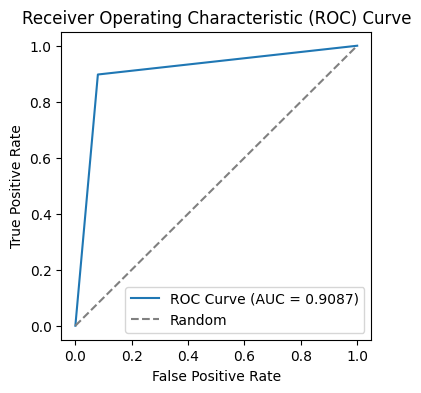

In [67]:
# Example usage:
evaluate_model(best_pipeline, test_dt_lr)

In [68]:
from sklearn.calibration import CalibratedClassifierCV
import joblib
# Load the best logistic regression model
best_pipeline = joblib.load('best_DT_Regression.pkl')
# Prepare the test set for logistic regression
X_test_dt_reg = test_dt_lr.drop(train_exclude_cols, axis=1)
# Make predictions on the test set
y_pred_dt_reg = best_pipeline.predict(X_test_dt_reg)
# Now, you can calibrate the predictions using CalibratedClassifierCV
calibrated_clf = CalibratedClassifierCV(best_pipeline, method='sigmoid', cv='prefit')
# Assuming you have training data (data_p) to calibrate the model
X_train_calibrate = data_dt_lr.drop(train_exclude_cols, axis=1)
y_train_calibrate = data_dt_lr['TARGET']
# Fit the calibrated model
calibrated_clf.fit(X_train_calibrate, y_train_calibrate)
# Calibrate the predictions
y_pred_calibrated_dt_lr = calibrated_clf.predict_proba(X_test_dt_reg)[:, 1]
# Now y_pred_calibrated contains the calibrated probabilities
# Convert probabilities to percentages
test_f['DT_LinReg_Prob'] = y_pred_calibrated_dt_lr * 100
# Display the updated DataFrame
print(test_f.head())

    LOAD_DTTM SECTION_ECONOMIC_ACTIVITY_CD FLAG_STARTUP FLAG_ESFL FLAG_SGPS   
0  2021-05-31                            A          0.0       0.0       0.0  \
1  2021-06-30                            A          0.0       0.0       0.0   
2  2021-07-31                            A          0.0       0.0       0.0   
3  2021-08-31                            A          0.0       0.0       0.0   
4  2021-09-30                            A          0.0       0.0       0.0   

    ASSET_AMT  TURNOVER_AMT  AUTONOMIA_FINAN_CORRIGIDA_PCT   
0  2915875.69      86811.87                           0.29  \
1  2915875.69      86811.87                           0.29   
2  2915875.69      86811.87                           0.29   
3  2915875.69      86811.87                           0.29   
4  2915875.69      86811.87                           0.29   

   RESULTADO_OPER_VS_JUROS_SUPOR  AVG_CRED_VENC_VS_RESP_CGA_12M   
0                           1.66                            0.0  \
1                 

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_13615/790059821.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['DT_LinReg_Prob'] = y_pred_calibrated_dt_lr * 100


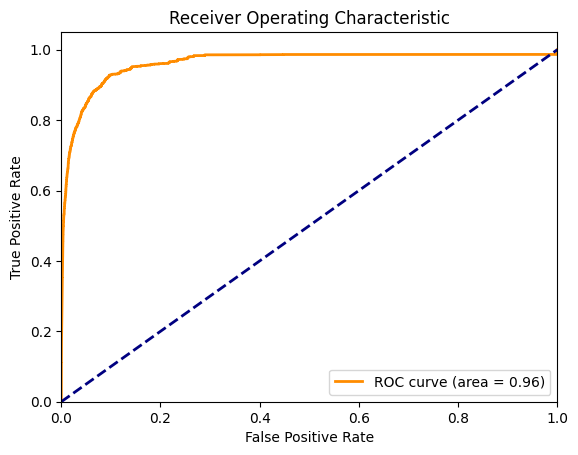

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_dt_lr)
roc_auc = auc(fpr, tpr)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## NN's

### NN + LR

In [70]:
train_nn, train_lr = custom_split(data_p, 0.5)
train_nn_1, val_nn = custom_split(train_nn, 0.30)
test_nn_lr = test_f

print('data_p:',len(data_p))
print('train_nn:',len(train_nn),' | train_lr:',len(train_lr))
print('train_nn_1:',len(train_nn_1),' | val_nn:',len(val_nn))

data_p: 651204
train_nn: 325668  | train_lr: 325536
train_nn_1: 227643  | val_nn: 98025


In [71]:
train_exclude_cols =['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default','TARGET']
Y_train_nn_1 = train_nn_1['TARGET']
X_train_nn_1 = train_nn_1.drop(columns=train_exclude_cols)
#val
#y_val = to_categorical(val['TARGET'])
y_val_nn = val_nn['TARGET']
x_val_nn = val_nn.drop(columns=train_exclude_cols)

Y_train_lr = train_lr['TARGET']
X_train_lr = train_lr.drop(columns=train_exclude_cols)

Y_test_nn_lr = test_nn_lr['TARGET']
X_test_nn_lr = test_nn_lr.drop(columns=train_exclude_cols)

In [72]:
numeric_columns = X_train_nn_1.select_dtypes(include=[np.number]).columns.tolist()
factor_columns = X_train_nn_1.select_dtypes(include=['category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('correlation_threshold', CorrelationThreshold(0.8)),
            ('scaler', StandardScaler())
        ]), numeric_columns),
        ('cat', Pipeline([
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), factor_columns)])

# Step 1: Preprocess the data using preprocessor_2
X_train_nn_1 = preprocessor.fit_transform(X_train_nn_1)
x_val_nn = preprocessor.transform(x_val_nn)
X_train_lr = preprocessor.transform(X_train_lr)
X_test_nn_lr = preprocessor.transform(X_test_nn_lr)

In [73]:
#numeric_columns = X_train_nn_1.select_dtypes(include=[np.number]).columns.tolist()
#factor_columns = X_train_nn_1.select_dtypes(include=['category']).columns.tolist()
#scaler = StandardScaler()
#scaler.fit(X_train_nn_1[numeric_columns])
#x_val_nn_scaled = scaler.transform(x_val_nn[numeric_columns])
#X_train_nn_1_scaled = scaler.transform(X_train_nn_1[numeric_columns])
#X_train_lr_scaled = scaler.transform(X_train_lr[numeric_columns])
#X_test_nn_lr_scaled = scaler.transform(X_test_nn_lr[numeric_columns])
#X_train_nn_1_categorical = pd.get_dummies(X_train_nn_1[factor_columns], drop_first=True)
#x_val_nn_categorical = pd.get_dummies(x_val_nn[factor_columns], drop_first=True)
#X_train_lr_categorical = pd.get_dummies(X_train_lr[factor_columns], drop_first=True)
#X_test_nn_lr_categorical = pd.get_dummies(X_test_nn_lr[factor_columns], drop_first=True)
#X_train_nn_1 = np.concatenate([X_train_nn_1_scaled, X_train_nn_1_categorical], axis=1)
#x_val_nn = np.concatenate([x_val_nn_scaled, x_val_nn_categorical], axis=1)
#X_train_lr = np.concatenate([X_train_lr_scaled, X_train_lr_categorical], axis=1)
#X_test_nn_lr = np.concatenate([X_test_nn_lr_scaled, X_test_nn_lr_categorical], axis=1)

print('Training NN data set size labels:', Y_train_nn_1.shape, 'Variables:', X_train_nn_1.shape)
print('Validation data set size :', y_val_nn.shape, 'Variables:', x_val_nn.shape)
print('Training LR data set size labels:', Y_train_lr.shape, 'Variables:', X_train_lr.shape)
print('Training LR data set size labels:', Y_test_nn_lr.shape, 'Variables:', X_test_nn_lr.shape)

Training NN data set size labels: (227643,) Variables: (227643, 51)
Validation data set size : (98025,) Variables: (98025, 51)
Training LR data set size labels: (325536,) Variables: (325536, 51)
Training LR data set size labels: (279905,) Variables: (279905, 51)


In [74]:
np.random.seed(2023)
network = models.Sequential()

# number of samples in the training and validation sets
train_samples = len(train_nn_1)
val_samples = len(val_nn)


# Step 0: Undersample the data
undersampler = RandomUnderSampler(sampling_strategy='auto')  # Adjust sampling_strategy as needed
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train_nn_1, Y_train_nn_1)

# Set the batch size
batch_size = 100

# Calculation of the the steps per epoch and validation steps
steps_per_epoch = train_samples // batch_size
validation_steps = val_samples // batch_size


network.add(layers.Dense(units=64, activation="relu", input_shape=(X_train_nn_1.shape[-1],)))
network.add(layers.BatchNormalization())
network.add(layers.Dense(256, activation='relu'))
#network.add(layers.Dropout(0.7))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer = optimizers.Adam(learning_rate=0.000005),
                loss='binary_crossentropy',
                metrics=['AUC', 'acc'])

early_stopping = EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_NN.keras', monitor='val_auc', save_best_only=True, mode='max')

history = network.fit(
    X_train_resampled,  # Assuming X_train_resampled and Y_train_resampled are numpy arrays
    Y_train_resampled,
    batch_size=batch_size,
    epochs= 150,
    validation_data=(x_val_nn, y_val_nn),
    callbacks=[model_checkpoint, early_stopping])

Epoch 1/150


2023-12-19 11:12:16.806939: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


72/72 [==============================] - 1s 12ms/step - loss: 0.7233 - auc: 0.3774 - acc: 0.4837 - val_loss: 0.6696 - val_auc: 0.3767 - val_acc: 0.8974
Epoch 2/150
72/72 [==============================] - 1s 11ms/step - loss: 0.6829 - auc: 0.5946 - acc: 0.6076 - val_loss: 0.6904 - val_auc: 0.6247 - val_acc: 0.9044
Epoch 3/150
72/72 [==============================] - 1s 12ms/step - loss: 0.6473 - auc: 0.7569 - acc: 0.6759 - val_loss: 0.7001 - val_auc: 0.8007 - val_acc: 0.9453
Epoch 4/150
72/72 [==============================] - 1s 13ms/step - loss: 0.6141 - auc: 0.8560 - acc: 0.7316 - val_loss: 0.7051 - val_auc: 0.8702 - val_acc: 0.9554
Epoch 5/150
72/72 [==============================] - 1s 12ms/step - loss: 0.5832 - auc: 0.9037 - acc: 0.7763 - val_loss: 0.7045 - val_auc: 0.8937 - val_acc: 0.9545
Epoch 6/150
72/72 [==============================] - 1s 13ms/step - loss: 0.5549 - auc: 0.9222 - acc: 0.8129 - val_loss: 0.6988 - val_auc: 0.9048 - val_acc: 0.9518
Epoch 7/150
72/72 [=========

3064/3064 [==============================] - 1s 345us/step


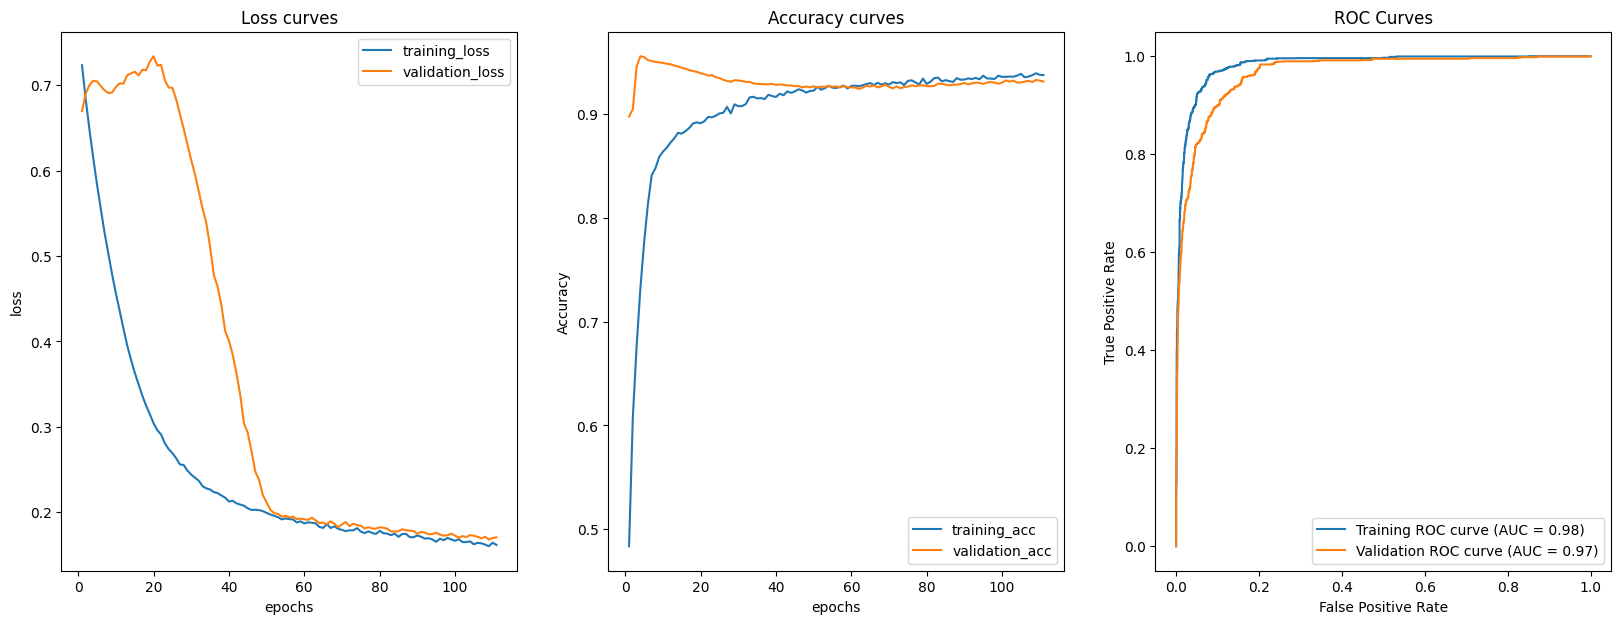

In [75]:
plot_loss_curves(history, x_val_nn, y_val_nn)

#### Extracting the features

In [76]:
from keras.models import load_model, Model
import pandas as pd

# Load the best model
best_model = load_model('best_NN.keras')

# Extract features from the last dense layer
features_from_last_layer = best_model.layers[-2].output
feature_extraction_model = Model(inputs=best_model.input, outputs=features_from_last_layer)

# Get the features for the train_lr data
features_train_lr = feature_extraction_model.predict(X_train_lr)

# Convert the extracted features to a DataFrame
features_train_lr = pd.DataFrame(features_train_lr)
features_train_lr.reset_index(drop=True, inplace=True)

# Extract additional columns from the original train_lr dataset
additional_columns = train_lr[['IDENTIFIER', 'ever_default', 'TARGET']]
additional_columns.reset_index(drop=True, inplace=True)

# Concatenate the additional columns with the features obtained from the last dense layer
features_train_lr = pd.concat([additional_columns, features_train_lr], axis=1)

10173/10173 [==============================] - 3s 333us/step


In [77]:
# Test features
# Load the best model
best_model = load_model('best_NN.keras')

# Extract features from the last dense layer
features_from_last_layer = best_model.layers[-2].output
feature_extraction_model = Model(inputs=best_model.input, outputs=features_from_last_layer)

features_test_nn_lr = feature_extraction_model.predict(X_test_nn_lr)

# Convert the extracted features to a DataFrame
features_test_nn_lr = pd.DataFrame(features_test_nn_lr)
features_test_nn_lr.reset_index(drop=True, inplace=True)

# Extract additional columns from the original train_lr dataset
additional_columns = test_nn_lr[['IDENTIFIER', 'ever_default', 'TARGET']]
additional_columns.reset_index(drop=True, inplace=True)

# Concatenate the additional columns with the features obtained from the last dense layer
features_test_nn_lr = pd.concat([additional_columns, features_test_nn_lr], axis=1)

8748/8748 [==============================] - 3s 358us/step


#### LR

In [79]:
# Folds
Id_ever_d = features_train_lr[['IDENTIFIER', 'ever_default']].drop_duplicates()

folds = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
for train_index, test_index in cv.split(Id_ever_d['IDENTIFIER'], Id_ever_d['ever_default']):
    # Extracting training and testing identifiers
    train_ids = Id_ever_d['IDENTIFIER'].iloc[train_index]
    test_ids = Id_ever_d['IDENTIFIER'].iloc[test_index]

    # Creating training and testing datasets by filtering the original data
    train_data = features_train_lr[features_train_lr['IDENTIFIER'].isin(train_ids)]
    test_data = features_train_lr[features_train_lr['IDENTIFIER'].isin(test_ids)]

    # Appending the datasets to the folds list
    folds.append((train_data, test_data))

In [80]:
# Check if the test data in each fold is the same
for i, (_, test_fold) in enumerate(folds):
    if i > 0:
        # Compare the test identifiers of the current fold with the previous fold
        current_test_identifiers = set(test_fold['IDENTIFIER'])
        previous_test_identifiers = set(folds[i - 1][1]['IDENTIFIER'])
        
        if current_test_identifiers != previous_test_identifiers:
            print(f"Test data in Fold {i + 1} is different from Fold {i}.")

Test data in Fold 2 is different from Fold 1.
Test data in Fold 3 is different from Fold 2.
Test data in Fold 4 is different from Fold 3.
Test data in Fold 5 is different from Fold 4.


In [81]:
numeric_columns = features_train_lr.select_dtypes(include=[np.number]).columns.tolist() # there are only numeric columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('correlation_threshold', CorrelationThreshold(0.8)),
            ('scaler', StandardScaler())
        ]), numeric_columns)])

train_exclude_cols =['IDENTIFIER','ever_default','TARGET']


def pipeline_custom(preprocessor,classifier):
    pipeline = ImbPipeline([('preprocessor', preprocessor),
                            ('undersampler', RandomUnderSampler(random_state=42)),
                            ('model', classifier)])
    return pipeline

In [82]:
np.random.seed(2023)
param_distributions = {
    'Logistic Regression': {
        'model__C': uniform(0.000001, 0.4)}}

classifiers = [('Logistic Regression', LogisticRegression())]

# Initialize an empty DataFrame to store results
results = pd.DataFrame(columns=['Classifie2r', 'Params', 'Fold', 'ROC_AUC', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Iterate over classifiers
for clf_name, clf in classifiers:
    # Iterate over random hyperparameter samples
    for i in range(100): 
        params = {
            'model__C': param_distributions[clf_name]['model__C'].rvs()}

        # Iterate over folds
        for j, (train_data, test_data) in enumerate(folds):
            # Define your regression target
            target = 'TARGET'

            # Separate features and target variable for the fold
            X_train = train_data.drop(train_exclude_cols, axis=1)
            y_train = train_data[target]

            X_test = test_data.drop(train_exclude_cols, axis=1)
            y_test = test_data[target]
            
            # Update pipeline_custom to set the hyperparameters correctly
            clf_instance = LogisticRegression(C=params['model__C'], max_iter=1000, solver = 'newton-cholesky')
            pipeline = pipeline_custom(preprocessor, clf_instance)

            # Fit the model
            pipeline.fit(X_train, y_train)

            # Make predictions on the test set
            y_pred = pipeline.predict(X_test)

            # Calculate metrics
            roc_auc = roc_auc_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            # Append results to the DataFrame
            results = pd.concat([results, pd.DataFrame({
                'Classifier': clf_name,
                'Params': str(params),  # Convert params to string for better readability
                'Fold': j + 1,
                'ROC_AUC': roc_auc,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1': f1}, index=[0])], ignore_index=True)

In [83]:
from sklearn.metrics import roc_auc_score
import joblib 
# Sort the results DataFrame based on the desired metric (e.g., ROC_AUC)
results_sorted = results.sort_values(by='ROC_AUC', ascending=False)
# Take the top row (best model)
best_result = results_sorted.iloc[0]
# Extract information about the best model
best_clf_name = best_result['Classifier']
best_params = eval(best_result['Params'])  # Convert string to dictionary
# Create the best model using the best parameters
best_clf_instance = LogisticRegression(C=best_params['model__C'], max_iter=1000, solver = 'newton-cholesky')
best_pipeline = pipeline_custom(preprocessor, best_clf_instance)

# Fit the best model on the entire dataset
X_full = features_train_lr.drop(train_exclude_cols, axis=1)
y_full = features_train_lr['TARGET']
best_pipeline.fit(X_full, y_full)
# Save the best model using joblib (or other appropriate method)
joblib.dump(best_pipeline, 'best_NN_reg.pkl')

['best_NN_reg.pkl']

In [84]:
best_params['model__C']

0.0052832524512086585

ROC AUC: 0.8933
Accuracy: 0.9057
Precision: 0.1305
Recall: 0.8804
F1 Score: 0.2273
Confusion Matrix:
[[249638  25860]
 [   527   3880]]


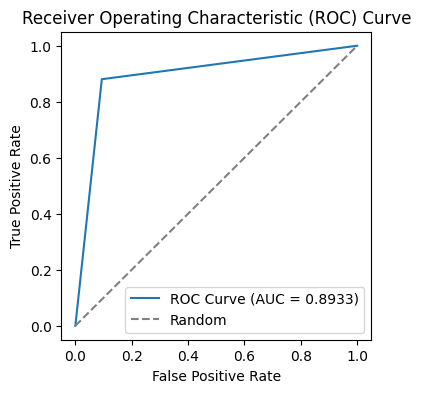

In [85]:
evaluate_model_2(best_pipeline, features_test_nn_lr)

In [86]:
from sklearn.calibration import CalibratedClassifierCV
import joblib
# Prepare the test set for logistic regression
X_features_test_nn_lr = features_test_nn_lr.drop(['IDENTIFIER','ever_default','TARGET'], axis=1)

# Make predictions on the test set
y_pred_logreg = best_pipeline.predict(X_features_test_nn_lr)
# Now, you can calibrate the predictions using CalibratedClassifierCV
calibrated_clf = CalibratedClassifierCV(best_pipeline, method='sigmoid', cv='prefit')
# Assuming you have training data (data_p) to calibrate the model
X_train_calibrate = features_train_lr.drop(['IDENTIFIER','ever_default','TARGET'],axis=1)
y_train_calibrate = features_train_lr['TARGET']
# Fit the calibrated model
calibrated_clf.fit(X_train_calibrate, y_train_calibrate)
# Calibrate the predictions
y_pred_calibrated_nn_lr = calibrated_clf.predict_proba(X_features_test_nn_lr)[:, 1]
# Now y_pred_calibrated contains the calibrated probabilities
# Convert probabilities to percentages
test_f['NN_LinReg_Prob'] = y_pred_calibrated_nn_lr * 100
# Display the updated DataFrame
print(test_f.head())

    LOAD_DTTM SECTION_ECONOMIC_ACTIVITY_CD FLAG_STARTUP FLAG_ESFL FLAG_SGPS   
0  2021-05-31                            A          0.0       0.0       0.0  \
1  2021-06-30                            A          0.0       0.0       0.0   
2  2021-07-31                            A          0.0       0.0       0.0   
3  2021-08-31                            A          0.0       0.0       0.0   
4  2021-09-30                            A          0.0       0.0       0.0   

    ASSET_AMT  TURNOVER_AMT  AUTONOMIA_FINAN_CORRIGIDA_PCT   
0  2915875.69      86811.87                           0.29  \
1  2915875.69      86811.87                           0.29   
2  2915875.69      86811.87                           0.29   
3  2915875.69      86811.87                           0.29   
4  2915875.69      86811.87                           0.29   

   RESULTADO_OPER_VS_JUROS_SUPOR  AVG_CRED_VENC_VS_RESP_CGA_12M   
0                           1.66                            0.0  \
1                 

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_13615/286636673.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_f['NN_LinReg_Prob'] = y_pred_calibrated_nn_lr * 100


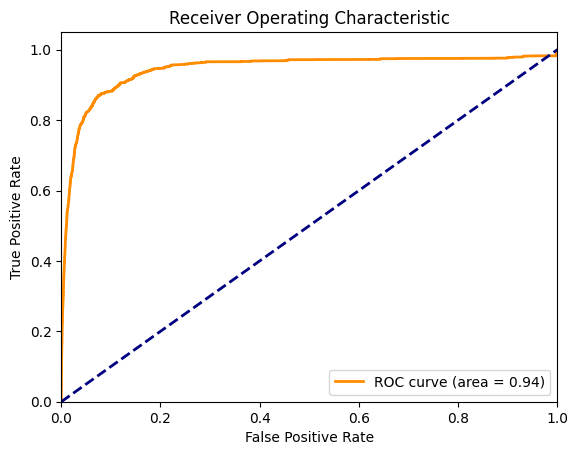

In [87]:
fpr, tpr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_nn_lr)
roc_auc = auc(fpr, tpr)
# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Exporting test_f

In [88]:
test_f.to_csv('test_f.csv', index=False)

### Only NN -- NOT USED

In [ ]:
train_1, val = custom_split(data_p, 0.25)
print('data_p:',len(data_p))
print('train_1:',len(train_1))
print('val:',len(val))
print('test_f:', len(test_f))

In [ ]:
train_exclude_cols =['LOAD_DTTM','FINAL_RATING_STANDARD','DEFAULT_FLG','IDENTIFIER','ever_default','TARGET']
#test_f
#Y_test_f = to_categorical(test_f['TARGET'])
Y_test_f = test_f['TARGET']
X_test_f = test_f.drop(columns=train_exclude_cols)
X_test_f = X_test_f.drop(columns=['EXPOSURE'])
#train
#Y_train = to_categorical(train['TARGET'])
Y_train = train_1['TARGET']
X_train = train_1.drop(columns=train_exclude_cols)
#val
#y_val = to_categorical(val['TARGET'])
y_val = val['TARGET']
x_val = val.drop(columns=train_exclude_cols)

In [ ]:
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
factor_columns = X_train.select_dtypes(include=['category']).columns.tolist()

In [ ]:
# check TABBIE
network = models.Sequential()
# number of samples in the training and validation sets
train_samples = len(X_train)
val_samples = len(x_val)


# Step 0: Undersample the data
undersampler = RandomUnderSampler(sampling_strategy=0.5)  # Adjust sampling_strategy as needed
X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

# Set the batch size
batch_size = 120

# Calculation of the the steps per epoch and validation steps
steps_per_epoch = train_samples // batch_size
validation_steps = val_samples // batch_size


network.add(layers.Dense(units=32, activation="relu", input_shape=(X_train.shape[-1],)))
#network.add(layers.BatchNormalization())
#
network.add(layers.Reshape((32, 1)))
network.add(layers.Conv1D(32, 3, activation='relu'))
network.add(layers.MaxPooling1D(pool_size=2))
network.add(layers.Flatten())
#
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer = optimizers.Adam(learning_rate=0.0001),
                loss='binary_crossentropy',
                metrics=['acc', 'AUC'])

early_stopping = EarlyStopping(monitor='val_auc', patience=30, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_NN.keras', monitor='val_auc', save_best_only=True, mode='max')

history = network.fit(
    X_train_resampled,  # Assuming X_train_resampled and Y_train_resampled are numpy arrays
    Y_train_resampled,
    batch_size=batch_size,
    epochs= 30,
    validation_data=(x_val, y_val),
    callbacks=[model_checkpoint, early_stopping])

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[numeric_columns])

x_val_scaled = scaler.transform(x_val[numeric_columns])
X_train_scaled = scaler.transform(X_train[numeric_columns])
X_test_f_scaled = scaler.transform(X_test_f[numeric_columns])

X_train_categorical = pd.get_dummies(X_train[factor_columns], drop_first=True)
x_val_categorical = pd.get_dummies(x_val[factor_columns], drop_first=True)
X_test_f_categorical = pd.get_dummies(X_test_f[factor_columns], drop_first=True)

X_train = np.concatenate([X_train_scaled, X_train_categorical], axis=1)
x_val = np.concatenate([x_val_scaled, x_val_categorical], axis=1)
X_test_f = np.concatenate([X_test_f_scaled, X_test_f_categorical], axis=1)

print('Training data set size labels:', Y_train.shape, 'Variables:', X_train.shape)
print('Validation data set size :', y_val.shape, 'Variables:', x_val.shape)
print('Test data set size :', Y_test_f.shape, 'Variables:', X_test_f.shape)

In [ ]:
test_loss, test_acc, test_auc = network.evaluate(X_test_f, Y_test_f)
print('test_loss:', test_loss, 'test_acc:', test_acc, 'test_auc:', test_auc)
val_loss, val_acc, val_auc = network.evaluate(x_val, y_val)
print('val_loss:', val_loss, 'val_acc:', val_acc, 'val_auc:', val_auc)

In [ ]:
plot_loss_curves(history)

In [ ]:
network.save('best_NN.keras')

In [ ]:
best_NN = load_model('best_NN.keras')

In [ ]:
# Assuming you have a validation set (val_data, val_labels)
val_metrics = best_NN.evaluate(x_val, y_val)
print("Validation Loss:", val_metrics[0])
print("Validation Accuracy:", val_metrics[1])
print("Validation AUC:", val_metrics[2])

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.isotonic import IsotonicRegression

# Split your data into training and calibration sets
X_train_calibrate_NN, X_calibrate, y_train_calibrate_NN, y_calibrate = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42)

# Use the trained Keras model to predict probabilities on the calibration set
y_prob_calibrate_NN = best_NN.predict(X_calibrate)

# Apply Platt scaling manually
prob_pos_calibrate_NN, prob_pos_uncalibrated_NN = calibration_curve(y_calibrate, y_prob_calibrate_NN, n_bins=15)

# Use isotonic regression for calibration
calibration_model = IsotonicRegression()
calibration_model.fit(prob_pos_uncalibrated_NN, prob_pos_calibrate_NN)

# Calibrate the probabilities on the test set
y_prob_test_calibrated_NN = calibration_model.transform(best_NN.predict(X_test_f))

# Convert probabilities to percentages
calibrated_probabilities_percent = y_prob_test_calibrated_NN * 100

# Assuming that your classes are binary (0 and 1), select the probability of class 1
calibrated_probabilities_percent_class1 = calibrated_probabilities_percent

# Now you can use these calibrated probabilities as percentages in your DataFrame
test_f['NN_prob'] = calibrated_probabilities_percent_class1

# Display the updated DataFrame
print(test_f.head())

In [ ]:
test_f

## ROC Crurves

In [89]:
fpr_rf, tpr_rf, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# For XGB
fpr_xgb, tpr_xgb, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_XGB)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
# For DT+LR
fpr_dt_lr, tpr_dt_lr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_dt_lr)
roc_auc_dt_lr = auc(fpr_dt_lr, tpr_dt_lr)
# For Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
# For KNN
fpr_KNN, tpr_KNN, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
# For NN+LR
fpr_nn_lr, tpr_nn_lr, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_nn_lr)
roc_auc_nn_lr = auc(fpr_nn_lr, tpr_nn_lr)
# For SVM
fpr_svm, tpr_svm, _ = roc_curve(test_f['TARGET'], y_pred_calibrated_SVM)
roc_auc_svm = auc(fpr_svm, tpr_svm)

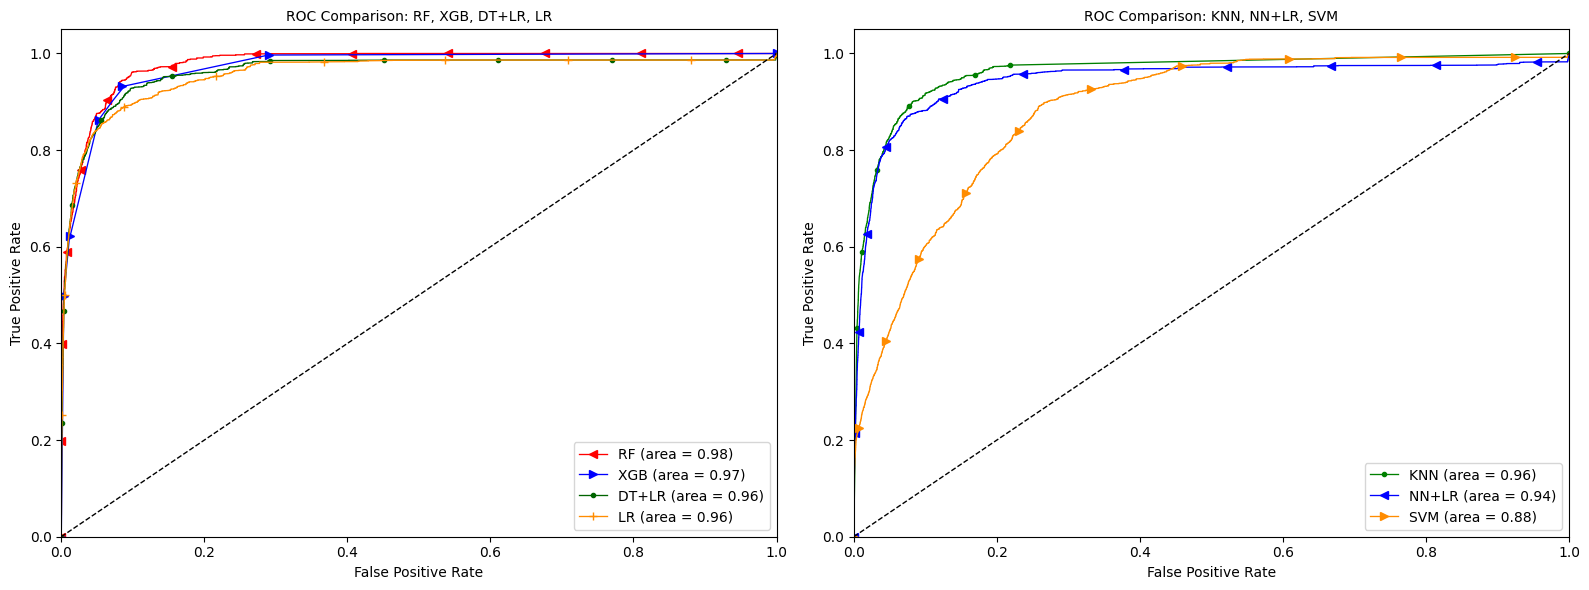

In [90]:
import matplotlib.pyplot as plt

# Set the marker intervals
marker_interval1 = 0.1
marker_interval2 = 0.1
# Set line width
lw = 0.95
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))
# Plotting on the first subplot
ax1.plot(fpr_rf, tpr_rf, color='red', lw=lw, marker='<', markevery=marker_interval1+0.01, label='RF (area = %0.2f)' % roc_auc_rf)
ax1.plot(fpr_xgb, tpr_xgb, color='blue', lw=lw, marker='>', markevery=marker_interval1+0.02, label='XGB (area = %0.2f)' % roc_auc_xgb)
ax1.plot(fpr_dt_lr, tpr_dt_lr, color='darkgreen', lw=lw, marker='.', markevery=marker_interval1+0.03, label='DT+LR (area = %0.2f)' % roc_auc_dt_lr)
ax1.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, marker='+', markevery=marker_interval1+0.04, label='LR (area = %0.2f)' % roc_auc_lr)
ax1.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=10)
ax1.set_ylabel('True Positive Rate', fontsize=10)
ax1.set_title('ROC Comparison: RF, XGB, DT+LR, LR', fontsize=10)
ax1.legend(loc="lower right", fontsize=10, frameon=True)
ax1.grid(False)
# Plotting on the second subplot
ax2.plot(fpr_KNN, tpr_KNN, color='green', lw=lw, marker='.', markevery=marker_interval2+0.01, label='KNN (area = %0.2f)' % roc_auc_KNN)
ax2.plot(fpr_nn_lr, tpr_nn_lr, color='blue', lw=lw, marker='<', markevery=marker_interval2+0.02, label='NN+LR (area = %0.2f)' % roc_auc_nn_lr)
ax2.plot(fpr_svm, tpr_svm, color='darkorange', lw=lw, marker='>', markevery=marker_interval2+0.03, label='SVM (area = %0.2f)' % roc_auc_svm)
ax2.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=10)
ax2.set_ylabel('True Positive Rate', fontsize=10)
ax2.set_title('ROC Comparison: KNN, NN+LR, SVM', fontsize=10)
ax2.legend(loc="lower right", fontsize=10, frameon=True)
ax2.grid(False)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
